<p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>EDA Projesi - Online Alışveriş</b></p>

<b>İçindekiler:</b>
<ul>
<li><a href="#import-library">Kütüphanelerin Yüklenmesi</a></li>
<li><a href="#loading-dataset">Veri Setinin Yüklenmesi</a></li>
<li><a href="#understanding-dataset">Veri Setini Anlama</a></li>
<li><a href="#organizing-columns">Sütunların Düzenlenmesi</a></li>
<li><a href="#nan-values">NaN Değerler</a></li>
<li><a href="#data-visualization">Veri Görselleştirme</a></li>
<li><a href="#conclusion">Sonuç</a></li>
</ul>

<a id='import-library'></a>
# <font color='navy'> <b>Kütüphanelerin Yüklenmesi</b><font color='black'> 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='navy'> <b>Veri Setinin Yüklenmesi</b><font color='black'> 

In [33]:
df0 = pd.read_csv("dataset.csv")
df = df0.copy()

In [34]:
df.head()

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
0,1,56.0,Female,USA,331.79,2021-11-21,Sports
1,2,69.0,Male,Australia,335.72,2022-03-05,Home & Kitchen
2,3,46.0,NaN,Germany,493.18,NaN,Books
3,4,32.0,Male,Germany,80.97,2023-06-08,Sports
4,5,60.0,Female,UK,21.75,NaN,Beauty


In [35]:
df.sample(5)

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
6725,6726,18.0,Female,France,248.78,2022-09-30,Clothing
6221,6222,21.0,Other,UK,NaN,2020-06-30,Beauty
4563,4564,27.0,Other,UK,419.23,2023-08-14,Books
10898,10899,18.0,Female,Canada,448.13,2023-07-19,Beauty
2984,2985,67.0,Female,UK,219.34,2020-06-13,Books


<a id='understanding-dataset'></a>
# <font color='navy'> <b>Veri Setini Anlama</b><font color='black'> 

In [37]:
df.shape

(15000, 7)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           15000 non-null  int64  
 1   Age               13500 non-null  float64
 2   Gender            14250 non-null  object 
 3   Country           13800 non-null  object 
 4   Purchase Amount   13200 non-null  float64
 5   Purchase Date     13950 non-null  object 
 6   Product Category  14100 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 820.4+ KB


In [39]:
df.isnull().sum()

User ID                0
Age                 1500
Gender               750
Country             1200
Purchase Amount     1800
Purchase Date       1050
Product Category     900
dtype: int64

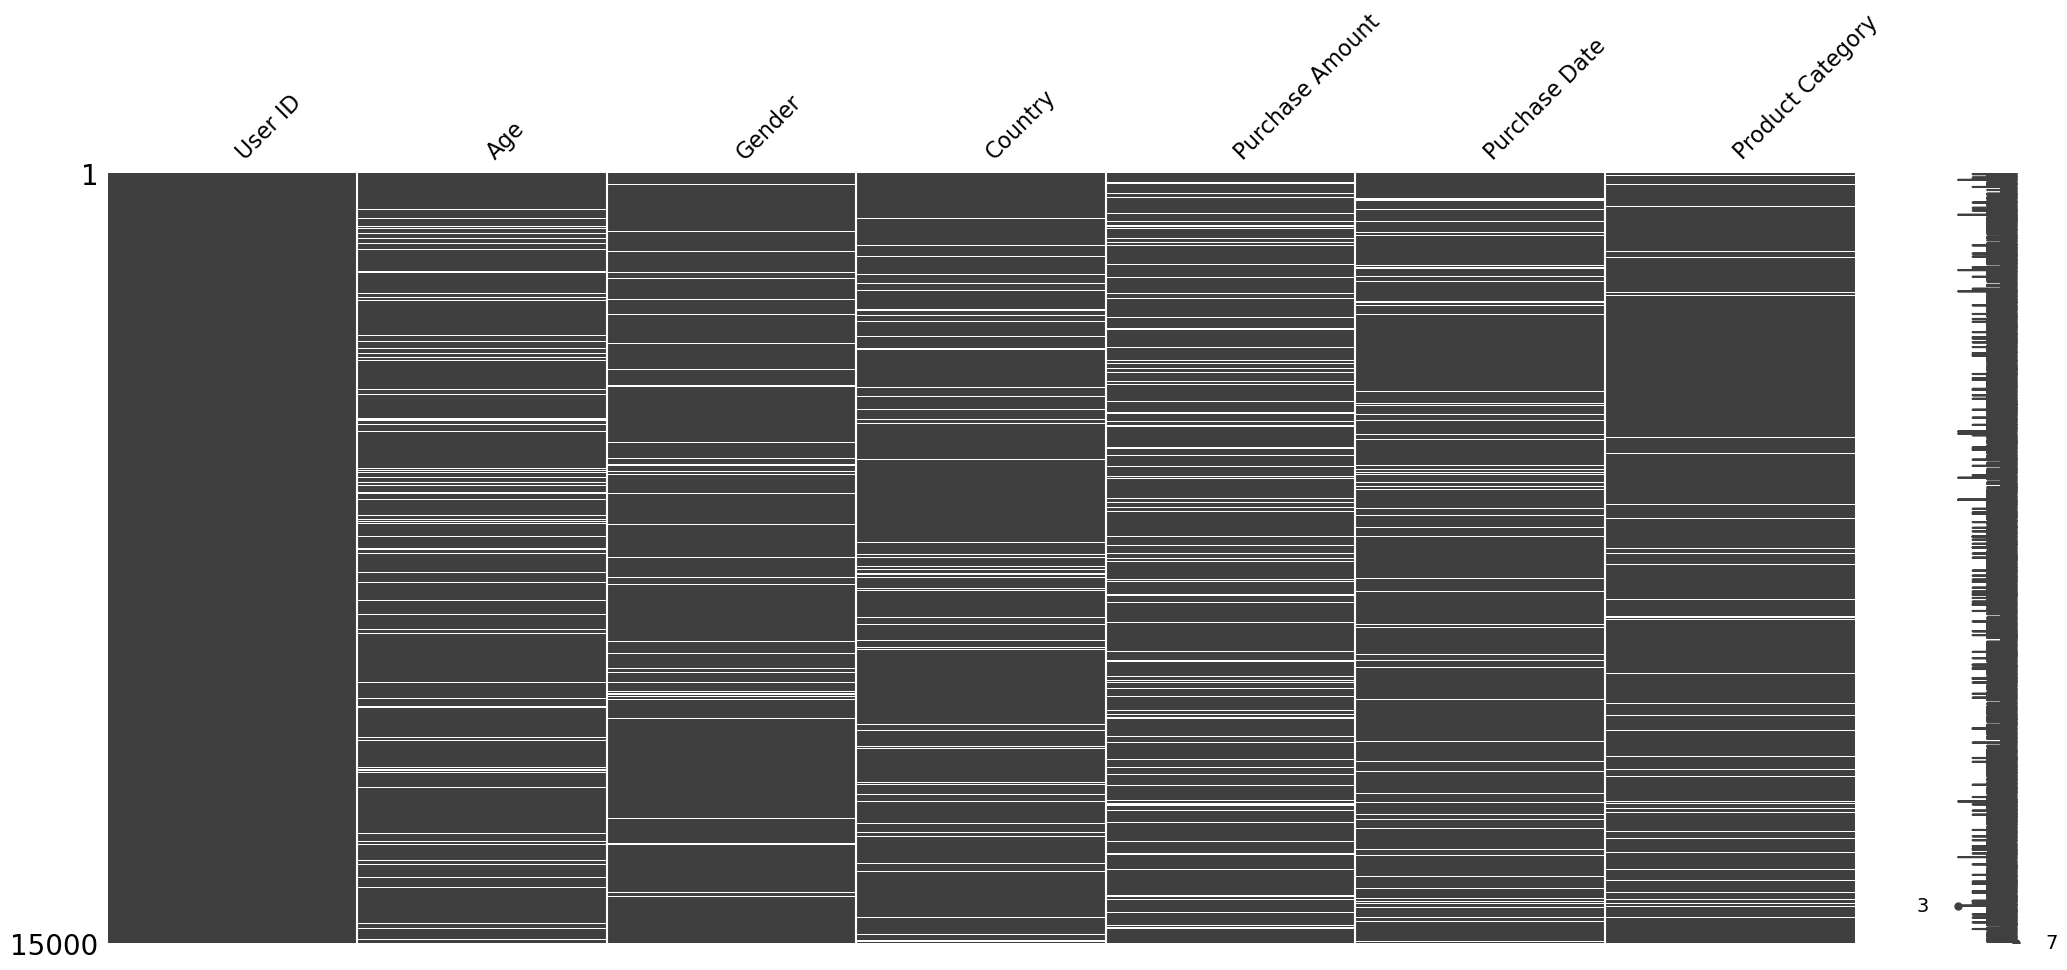

In [40]:
msno.matrix(df);

In [41]:
df.nunique()

User ID             15000
Age                    52
Gender                  3
Country                 6
Purchase Amount     11608
Purchase Date        1460
Product Category        6
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,15000.0,7500.50000,4330.271354,1.00,3750.750,7500.500,11250.250,15000.00
Age,13500.0,43.39600,14.927082,18.00,31.000,43.000,56.000,69.00
Purchase Amount,13200.0,253.21772,143.113919,5.05,130.335,253.645,378.585,499.95


In [44]:
df.describe(include= "object").T

,count,unique,top,freq
Gender,14250,3,Female,4818
Country,13800,6,France,2444
Purchase Date,13950,1460,2022-04-28,26
Product Category,14100,6,Clothing,2444


In [45]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15000  │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ User ID            │     0 │     0 │   7500 │   4330 │     1 │   3751 │   7500 │  11250 │  15000 │ ▇▇▇▇▇▇  │  │
│ │ Age                │  1500 │    10 │   43.4 │  14.93 │    18 │     31 │     43 │     56 │     69 │ ▇▇▇▇▇▇  │  │
│ │ Purchase Amount    │  1800 │    12 │  253.2 │  143.1 │  5.05 │  130.3 │  253.6 │  378.6 │  499.9 │ ▇▇▇▇▇▇  │  │
│ └────────────────────┴───────┴───────┴────────┴────────┴───────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA        ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                          │       750 │         5 │                      0.95 │                14250 │  │
│ │ Country                         │      1200 │         8 │                      0.92 │                13800 │  │
│ │ Purchase Date                   │      1050 │         7 │                      0.93 │                13950 │  │
│ │ Product Category                │       900 │         6 │                       1.3 │                18818 │  │
│ └─────────────────────────────────┴───────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<a id='organizing-columns'></a>
# <font color='navy'> <b>Sütunların Düzenlenmesi</b><font color='black'> 

In [47]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Country', 'Purchase Amount',
       'Purchase Date', 'Product Category'],
      dtype='object')

In [48]:
df.columns = df.columns.str.lower()

In [49]:
df.columns = ['user_id', 'age', 'gender', 'country', 'purchase_amount',
       'purchase_date', 'category']

In [50]:
df.columns

Index(['user_id', 'age', 'gender', 'country', 'purchase_amount',
       'purchase_date', 'category'],
      dtype='object')

## <font color='#40E0D0'> <b>"age" Sütunu</b><font color='black'> 

In [52]:
df.age.unique()

array([56., 69., 46., 32., 60., nan, 38., 36., 40., 28., 41., 53., 57.,
       20., 19., 61., 55., 50., 29., 39., 42., 66., 44., 59., 33., 64.,
       68., 54., 26., 35., 21., 31., 67., 43., 37., 24., 25., 34., 23.,
       51., 27., 48., 65., 62., 58., 18., 52., 22., 45., 49., 47., 30.,
       63.])

In [53]:
df.age.isnull().sum()

1500

In [54]:
df.age.dtype

dtype('float64')

NaN değerler doldurulduktan sonra age sütununun dtype'ı değiştirilecektir.

## <font color='#40E0D0'> <b>"gender" Sütunu</b><font color='black'> 

In [57]:
df.gender.unique()

array(['Female', 'Male', nan, 'Other'], dtype=object)

In [58]:
df.gender.isnull().sum()

750

In [59]:
df.gender.dtype

dtype('O')

NaN değerler doldurulduktan sonra gender sütununun dtype'ı değiştirilecektir.

## <font color='#40E0D0'> <b>"country" Sütunu</b><font color='black'> 

In [62]:
df.country.unique()

array(['USA', 'Australia', 'Germany', 'UK', 'France', 'Canada', nan],
      dtype=object)

In [63]:
df.country.isnull().sum()

1200

In [64]:
df.country.dtype

dtype('O')

NaN değerler doldurulduktan sonra country sütununun dtype'ı değiştirilecektir.

## <font color='#40E0D0'> <b>"purchase_amount" Sütunu</b><font color='black'> 

In [67]:
df.purchase_amount.nunique()

11608

In [68]:
df.purchase_amount.dtype

dtype('float64')

In [69]:
df.purchase_amount.unique()

array([331.79, 335.72, 493.18, ...,  27.73, 108.57, 105.57])

## <font color='#40E0D0'> <b>"purchase_date" Sütunu</b><font color='black'> 

In [71]:
df.purchase_date.nunique()

1460

In [72]:
df.purchase_date.unique()

array(['2021-11-21', '2022-03-05', nan, ..., '2023-09-03', '2023-10-27',
       '2023-01-07'], dtype=object)

In [73]:
df.purchase_date.dtype

dtype('O')

NaN değerler doldurulduktan sonra purchase_date sütununun dtype'ı değiştirilecektir.

## <font color='#40E0D0'> <b>"category" Sütunu</b><font color='black'> 

In [76]:
df.category.unique()

array(['Sports', 'Home & Kitchen', 'Books', 'Beauty', 'Clothing', nan,
       'Electronics'], dtype=object)

NaN değerler doldurulduktan sonra category sütununun dtype'ı değiştirilecektir.

<a id='nan-values'></a>
# <font color='navy'> <b>NaN Değerler</b><font color='black'> 

## <font color='#40E0D0'> <b>"country" Sütunundaki NaN Değerler</b><font color='black'> 

In [80]:
df.country.isnull().sum()

1200

In [81]:
df.country.value_counts()

country
France       2444
Germany      2330
Canada       2279
UK           2261
Australia    2256
USA          2230
Name: count, dtype: int64

In [82]:
countries = df.country.value_counts().index
countries

Index(['France', 'Germany', 'Canada', 'UK', 'Australia', 'USA'], dtype='object', name='country')

In [83]:
df['country'] = df['country'].apply(lambda x: x if pd.notna(x) else np.random.choice(countries))

In [84]:
df.country.value_counts()

country
France       2641
Germany      2526
Canada       2487
Australia    2468
UK           2444
USA          2434
Name: count, dtype: int64

In [85]:
df.country.isnull().sum()

0

## <font color='#40E0D0'> <b>"category" Sütunundaki NaN Değerler</b><font color='black'> 

In [87]:
df.category.isnull().sum()

900

In [88]:
df['category'] = df['category'].fillna(df.groupby('country')['category'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))

In [89]:
df.category.isnull().sum()

0

## <font color='#40E0D0'> <b>"gender" Sütunundaki NaN Değerler</b><font color='black'> 

In [91]:
df.gender.isnull().sum()

750

In [92]:
df.gender.value_counts()

gender
Female    4818
Other     4742
Male      4690
Name: count, dtype: int64

In [93]:
df.groupby(["category", "country"])["gender"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

category        country  
Beauty          Australia      Male
                Canada       Female
                France         Male
                Germany        Male
                UK           Female
                USA          Female
Books           Australia      Male
                Canada       Female
                France         Male
                Germany       Other
                UK             Male
                USA          Female
Clothing        Australia      Male
                Canada       Female
                France       Female
                Germany       Other
                UK             Male
                USA           Other
Electronics     Australia     Other
                Canada        Other
                France       Female
                Germany       Other
                UK             Male
                USA          Female
Home & Kitchen  Australia    Female
                Canada        Other
                France       Female
  

In [94]:
df['gender'] = df['gender'].fillna(df.groupby(["category", "country"])["gender"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))

In [95]:
df.gender.isnull().sum()

0

## <font color='#40E0D0'> <b>"age" Sütunundaki NaN Değerler</b><font color='black'> 

In [97]:
df.age.isnull().sum()

1500

In [98]:
df.age.mean()

43.396

In [99]:
df.age.median()

43.0

In [100]:
df.groupby(['category', 'gender'])['age'].mean().round(0)

category        gender
Beauty          Female    44.0
                Male      44.0
                Other     44.0
Books           Female    44.0
                Male      43.0
                Other     43.0
Clothing        Female    43.0
                Male      43.0
                Other     44.0
Electronics     Female    43.0
                Male      44.0
                Other     43.0
Home & Kitchen  Female    43.0
                Male      44.0
                Other     43.0
Sports          Female    43.0
                Male      43.0
                Other     44.0
Name: age, dtype: float64

In [101]:
df['age'] = df['age'].fillna(df.groupby(['category', 'gender'])['age'].transform("mean")).round(0)

In [102]:
df.age.isnull().sum()

0

## <font color='#40E0D0'> <b>"purchase_amount" Sütunundaki NaN Değerler</b><font color='black'> 

In [104]:
df.purchase_date.isnull().sum()

1050

In [105]:
df.groupby(['country', 'category'])['purchase_amount'].mean()

country    category      
Australia  Beauty            245.732669
           Books             254.236193
           Clothing          255.625374
           Electronics       259.189705
           Home & Kitchen    243.154412
           Sports            248.652242
Canada     Beauty            256.678166
           Books             257.504524
           Clothing          255.400233
           Electronics       241.509064
           Home & Kitchen    246.899088
           Sports            256.584788
France     Beauty            262.710583
           Books             244.427977
           Clothing          247.232438
           Electronics       253.127847
           Home & Kitchen    264.324935
           Sports            247.605289
Germany    Beauty            251.481718
           Books             267.385994
           Clothing          256.444018
           Electronics       261.769439
           Home & Kitchen    242.643075
           Sports            251.337521
UK         Bea

In [106]:
df["purchase_amount"] = df["purchase_amount"].fillna(df.groupby(['country', 'category'])['purchase_amount'].transform('mean'))

In [107]:
df.purchase_amount.isnull().sum()

0

## <font color='#40E0D0'> <b>"purchase_date" Sütunundaki NaN Değerler</b><font color='black'> 

In [109]:
df.purchase_amount.isnull().sum()

0

In [110]:
df['purchase_date'] = df.groupby(['country', 'category'])['purchase_date'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [111]:
df.purchase_amount.isnull().sum()

0

In [112]:
# NaN değerleri doldurduktan sonra;
df.isnull().sum().sum()

0

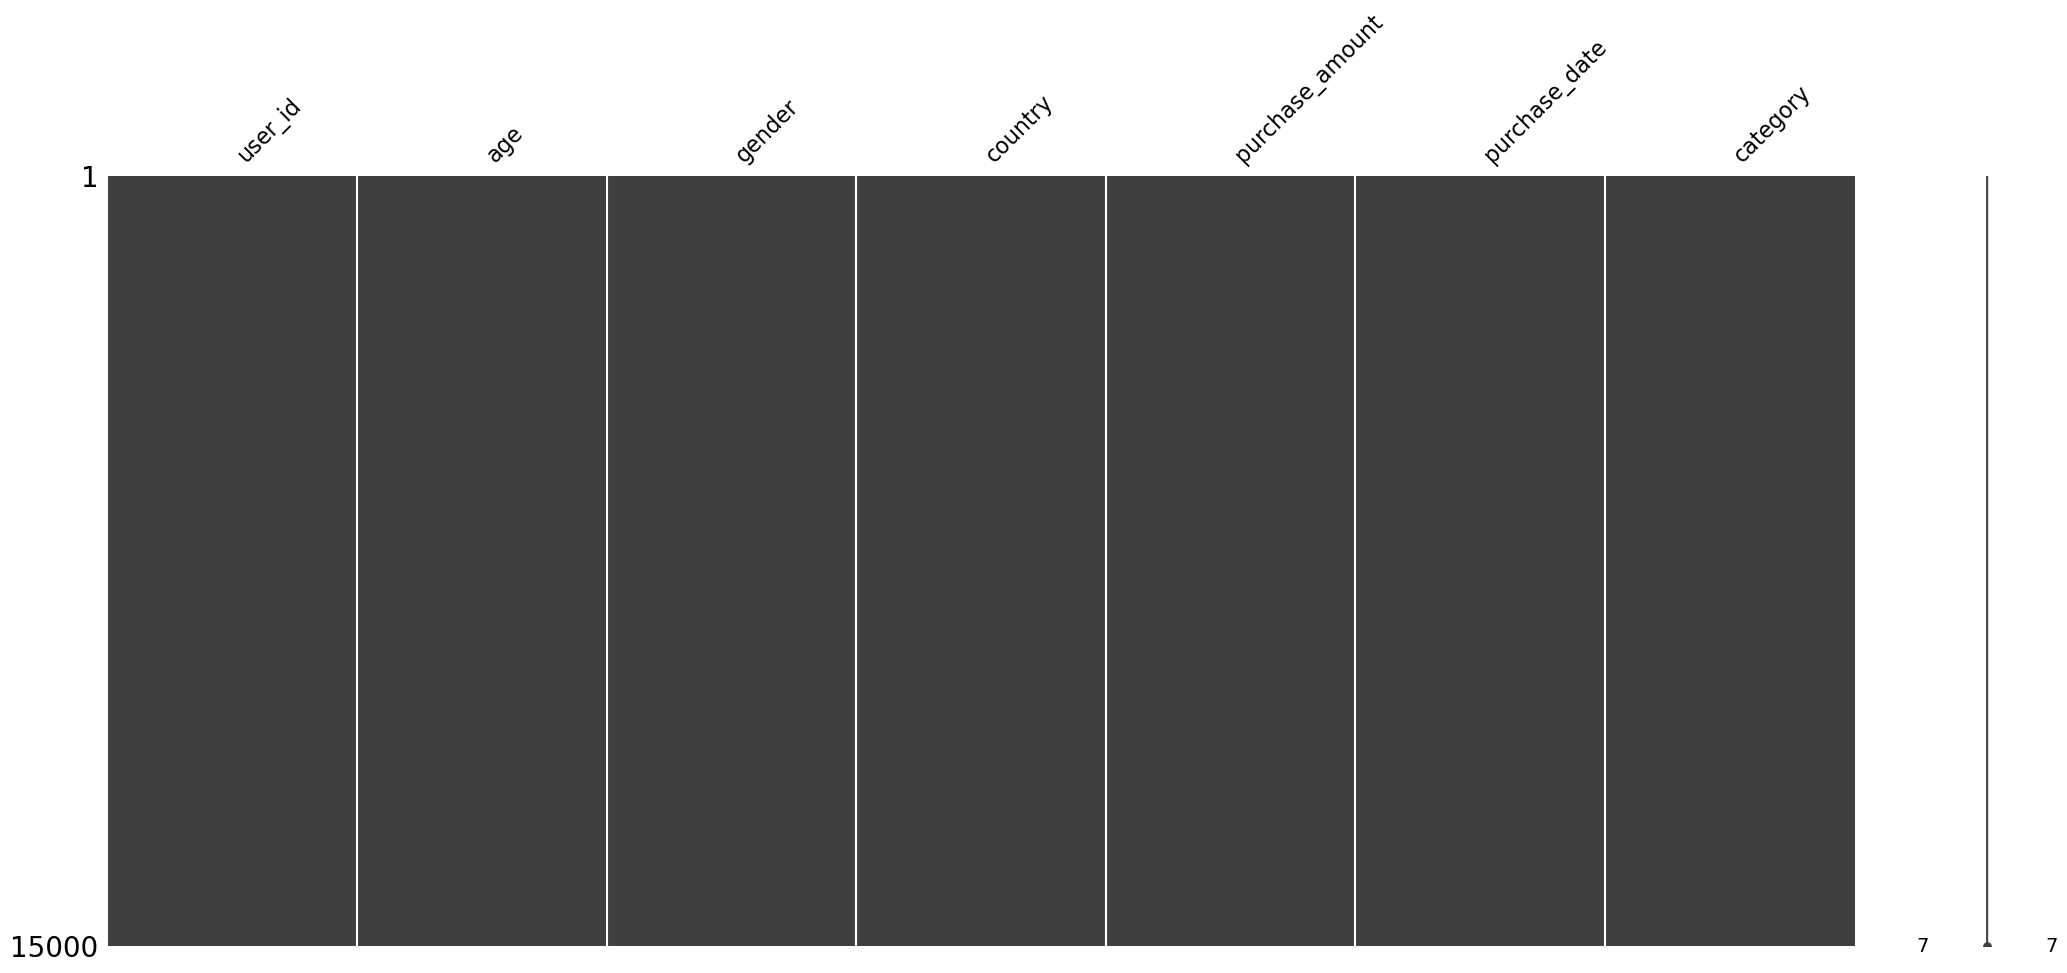

In [113]:
msno.matrix(df);

### <font color='#40E0D0'> <b>Sütunların Dtype'ının Değiştirilmesi</b><font color='black'> 

In [115]:
df.age = df.age.astype("int")

In [116]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [117]:
df['category'] = df['category'].astype('category')

In [118]:
df['gender'] = df['gender'].astype('category')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          15000 non-null  int64         
 1   age              15000 non-null  int32         
 2   gender           15000 non-null  category      
 3   country          15000 non-null  object        
 4   purchase_amount  15000 non-null  float64       
 5   purchase_date    15000 non-null  datetime64[ns]
 6   category         15000 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 557.1+ KB


<a id='data-visualization'></a>
# <font color='navy'> <b>Veri Görselleştirme</b><font color='black'> 

## <font color='#40E0D0'> <b>Cinsiyete Göre Dağılım</b><font color='black'> 

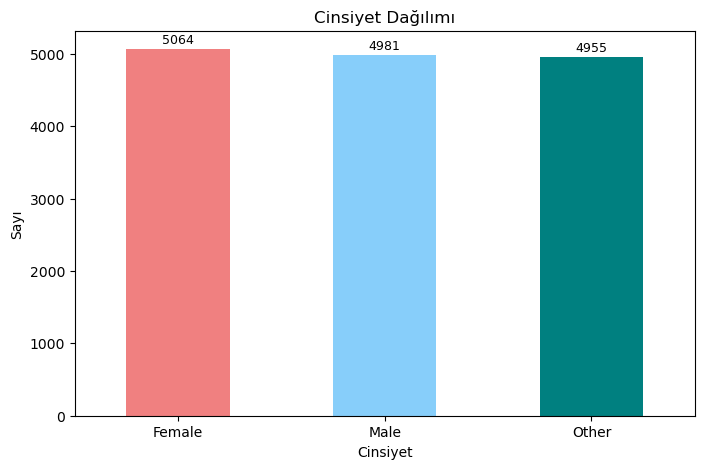

In [189]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 5))
ax1 = gender_counts.plot(kind='bar', color= ['lightcoral', 'lightskyblue', 'teal'])

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)

plt.title('Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Sayı')
plt.xticks(rotation=0)

plt.show()

Bu grafikte, veri setindeki kullanıcıların cinsiyet bazındaki dağılımı gösterilmektedir. Erkek ve kadın kullanıcı sayıları neredeyse eşittir; bu da iki cinsiyet arasında oldukça dengeli bir dağılım olduğunu gösteriyor. Diğer (other) kategorisinde ise biraz daha az kullanıcı vardır, ancak bu da dikkate alınması gereken bir gruptur. Cinsiyet dağılımının dengeli olması, analizlerde herhangi bir cinsiyetin baskın olmadığına ve kullanıcı alışkanlıkları veya satın alma davranışlarının her iki cinsiyet için de benzer olabileceğine işaret edebilmektedir. Ancak, "other" kategorisinin daha küçük olmasına rağmen, bu grubun harcama davranışlarını göz ardı etmemek de önemlidir. İleride yapılacak analizlerde, her bir cinsiyetin satın alma alışkanlıklarını karşılaştırmak faydalı olabilir.

## <font color='#40E0D0'> <b>Toplam Alım Tutarının Ülkelere Göre Dağılımı</b><font color='black'> 

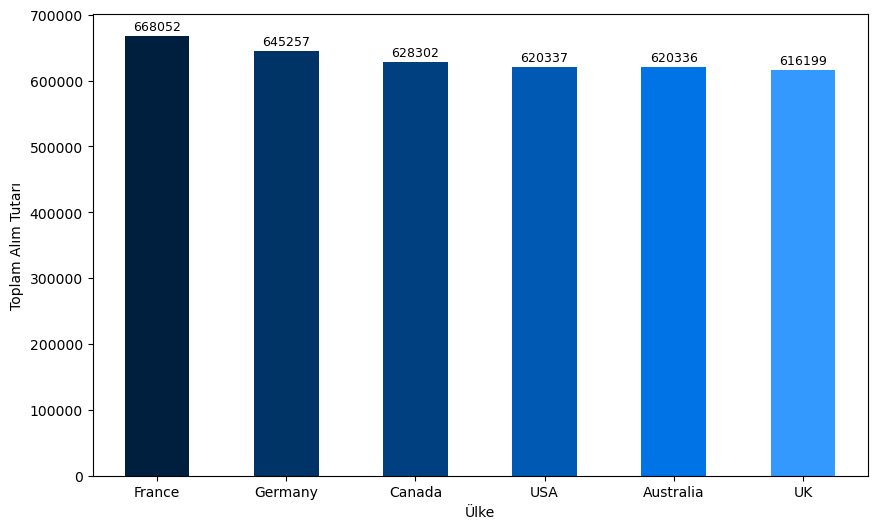

In [192]:
top_countries = df.groupby('country')['purchase_amount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
ax2 = top_countries.plot(kind='bar', color= ["#001f3f", "#003366", "#004080", "#0059b3", "#0073e6", "#3399ff"])

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)

plt.xlabel('Ülke')
plt.ylabel('Toplam Alım Tutarı')
plt.xticks(rotation=0)

plt.show()

Bu grafikte, her ülkenin toplam satın alma miktarları karşılaştırılmaktadır. Tüm ülkelerin toplam satın alma miktarları arasında çok büyük farklar olmadığı görülmektedir. Her ülke yaklaşık olarak aynı düzeyde harcama yapmıştır. **Fransa, Kanada ve Almanya** gibi ülkelerin başı çektiğini ancak diğer ülkelerin de önemli ölçüde katkıda bulunduğunu söylenebilir. Bu durum, veri setindeki müşteri tabanının coğrafi olarak geniş bir alana yayıldığını ve global anlamda eşit dağılımda harcama yapıldığını göstermektedir. Bu tür bir analiz, işletmelerin pazarlama stratejilerini her ülkede benzer şekilde sürdürebileceğini ve herhangi bir pazara yönelik özel bir strateji geliştirme gereksinimi olmadığını da göstermektedir.

## <font color='#40E0D0'> <b>Ürün Kategorisine Göre Fiyatlar</b><font color='black'> 

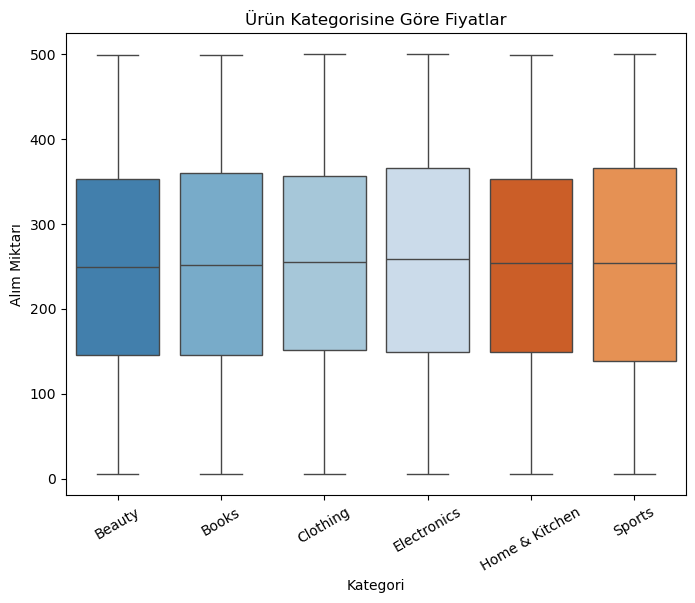

In [199]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='purchase_amount', data=df, palette='tab20c')

plt.title("Ürün Kategorisine Göre Fiyatlar")
plt.xticks(rotation=90)
plt.xlabel("Kategori")
plt.ylabel("Alım Miktarı")
plt.xticks(rotation=30)

plt.show()

Kutu grafiği, her ürün kategorisi için fiyatların dağılımını göstermektedir. Farklı ürün kategorilerindeki fiyatların genel olarak benzer bir aralıkta olduğunu, ancak bazı kategorilerde (örneğin, "Home & Kitchen" ve "Books") fiyatların ortalama değerinin biraz daha yüksek olduğu gözlemlenmektedir. Grafik, bu kategorilerin diğerlerinden daha pahalı ürünler içerdiğini ortaya koymaktadır. Kutu grafiği aynı zamanda bazı kategorilerde aşırı düşük veya yüksek fiyatlar olduğunu da göstermektedir (dış değerler/outliers). Bu aşırı değerler, özellikle lüks ürünlerin veya indirimli ürünlerin varlığına işaret edebilir ve bu noktalar özel promosyonlar veya müşteri segmentasyonu açısından değerlendirilebilir.

## <font color='#40E0D0'> <b>Yaş Dağılımı</b><font color='black'> 

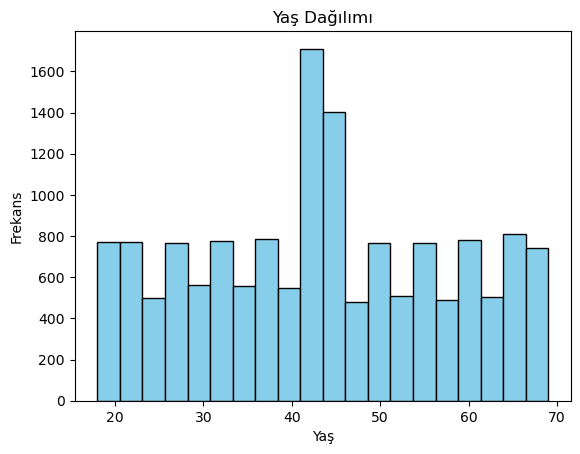

In [201]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')

plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')

plt.show()

Yaş dağılımı grafiği, veri setindeki kullanıcıların yaşlarına göre nasıl dağıldığını göstermektedir. En yoğun yaş grubu 25 civarında olup, genel kullanıcı kitlesinin gençlerden oluştuğu görülmektedir. 30'lu yaşlarda da bir diğer küçük zirve gözlemlenmektedir. Genç yaş grubu kullanıcıların daha fazla olması, bu grubun daha fazla harcama yapabileceğini veya daha aktif alışveriş davranışlarına sahip olabileceğini gösterir. Bu yaş grubundaki kullanıcıları hedef alan pazarlama kampanyaları daha başarılı olabilme eğilimindedir. Öte yandan, yaşça büyük kullanıcılar da göz ardı edilmemelidir çünkü bu kullanıcılar genellikle daha yüksek satın alma gücüne sahip olma potansiyeline sahiptirler.

## <font color='#40E0D0'> <b>Cinsiyete Göre Toplam Alım Tutarı</b><font color='black'> 

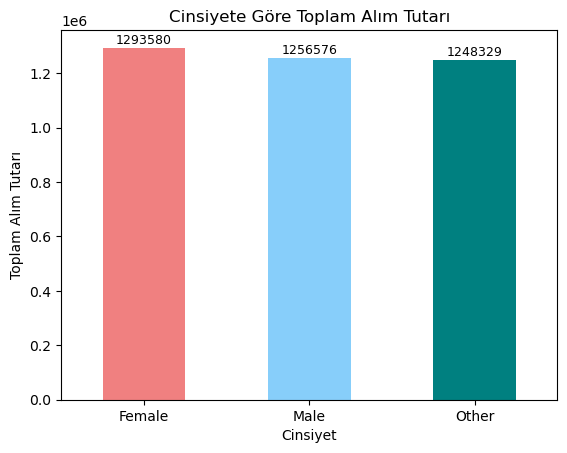

In [204]:
ax3 = df.groupby('gender')['purchase_amount'].sum().plot(kind='bar', color=['lightcoral', 'lightskyblue', 'teal'])

for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=1)

plt.title('Cinsiyete Göre Toplam Alım Tutarı')
plt.xlabel('Cinsiyet')
plt.ylabel('Toplam Alım Tutarı')
plt.xticks(rotation=0)

plt.show()

Cinsiyete göre toplam satın alma miktarlarını karşılaştıran bu grafikte, kadın ve erkek kullanıcıların satın alma miktarlarının neredeyse eşit olduğu gözlemlenmektedir. "Other" kategorisi ise belirgin şekilde daha düşük bir toplam harcamaya sahip. Bu durum, kadın ve erkek kullanıcıların alışveriş alışkanlıklarının benzer olduğunu göstermektedir.

## <font color='#40E0D0'> <b>Ülkelere Göre Satın Alma Dağılımı</b><font color='black'> 

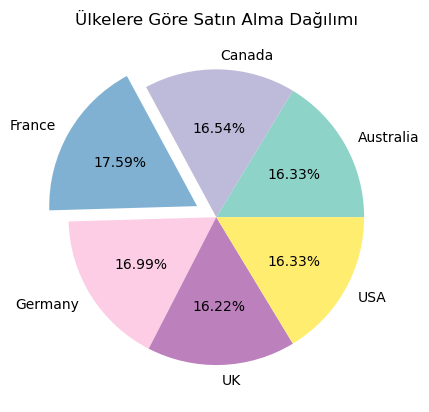

In [208]:
df.groupby('country')['purchase_amount'].sum().plot(kind='pie',
                                                    autopct='%1.2f%%',
                                                    explode= [0,0,0.15,0,0,0],
                                                    colormap='Set3'
                                                   )

plt.title('Ülkelere Göre Satın Alma Dağılımı')
plt.ylabel('')

plt.show()

Pasta grafiği, ülkeler arasındaki satın alma dağılımını göstermektedir. Fransa, Avustralya ve ABD, en fazla harcamayı yapan ülkeler olarak öne çıkmaktadır. Bu ülkeler pazarın büyük kısmını oluştururken, diğer ülkeler (örneğin Almanya, İngiltere) de önemli katkılarda bulunmaktadır. Bu dağılım, hangi ülkelerde pazar payının daha yüksek olduğunu ve hangi pazarlarda büyüme fırsatlarının olabileceğini göstermesi açısından önemlidir.

## <font color='#40E0D0'> <b>Ülkelere Göre Cinsiyet Dağılımı</b><font color='black'> 

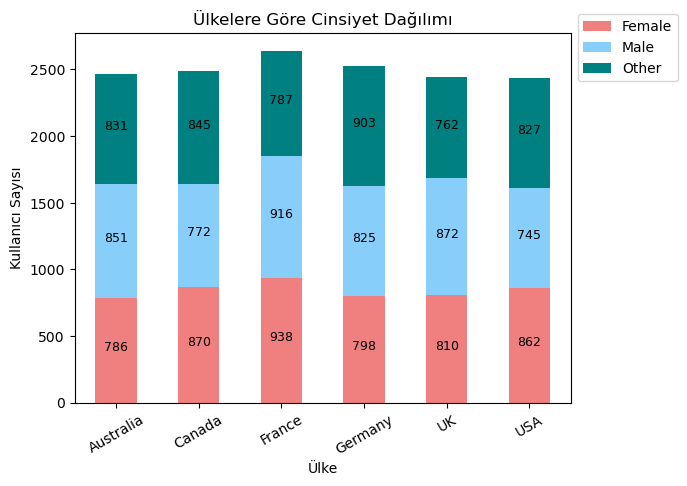

In [211]:
ax4 = df.groupby(['country', 'gender'])['user_id'].count().unstack().plot(kind='bar',
                                                                          stacked=True,
                                                                          color=['lightcoral', 'lightskyblue', 'teal']
                                                                         )

for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='center', fontsize=9, color='black', padding=2)

plt.title('Ülkelere Göre Cinsiyet Dağılımı')
plt.xlabel('Ülke')
plt.ylabel('Kullanıcı Sayısı')
plt.xticks(rotation= 30)
plt.legend(bbox_to_anchor= (1.23,1.07))

plt.show()

Ülkelere göre cinsiyet dağılımını gösteren bu yığılmış çubuk grafik, erkek ve kadın kullanıcıların her ülkede dengeli bir şekilde dağıldığını göstermektedir. "Other" kategorisinde ise her ülkede daha az sayıda kullanıcı bulunmaktadır. Bu veri, her ülkede pazarlama stratejilerinin cinsiyet dengesi göz önünde bulundurularak planlanabileceğini göstermektedir. Ancak, "other" kategorisi için de özel stratejiler geliştirilebilir.

<a id='conclusion'></a>
# <font color='navy'> <b>Sonuç</b><font color='black'> 

Bu projede, kullanıcı davranışlarını ve demografik bilgileri analiz etmek amacıyla çeşitli adımlar gerçekleştirilmiştir. İlk olarak, veri setindeki eksik (NaN) değerler, farklı teknikler kullanılarak doldurulmuştur. Bu adım, veri setinin tam ve güvenilir olmasını sağlamak için önemlidir. NaN değerlerinin doldurulmasının ardından, veri setinin genel yapısını anlamak amacıyla veri görselleştirme tekniklerine başvurulmuştur.

Yapılan analizlerde, cinsiyet, yaş, ülke ve satın alma miktarları gibi değişkenlerin dağılımları incelenerek kullanıcı kitlesinin demografik ve coğrafi yapısı ortaya konmuştur. Örneğin, cinsiyet dağılımı grafikleri, kullanıcı kitlesinin dengeli bir şekilde kadın ve erkeklerden oluştuğunu, yaş dağılımı ise genç yetişkinlerin (özellikle 25-30 yaş aralığının) daha aktif olduğunu göstermiştir. Ayrıca, ülkeler bazında toplam satın alma miktarlarının incelenmesi, harcamaların farklı ülkelerde oldukça dengeli dağıldığını ortaya koymuştur.

Bu görselleştirmeler, iş stratejilerini geliştirme sürecinde hangi demografik grupların hedeflenebileceği ve hangi coğrafi pazarlara odaklanılması gerektiği konusunda önemli bilgiler sunmuştur. Yaş grupları ve cinsiyet dağılımlarına göre farklı pazarlama stratejilerinin geliştirilmesi, potansiyel büyüme alanlarının keşfi için faydalı olabilir.

Genel olarak, bu proje, veri setindeki eksikliklerin giderilmesi ve görselleştirmeler aracılığıyla önemli kullanıcı içgörülerinin elde edilmesini sağlamıştır. Elde edilen bulgular, pazarlama stratejilerinin optimize edilmesi ve müşteri segmentlerinin daha iyi anlaşılması için kullanılabilir.

<p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>TEŞEKKÜRLER!</b></p>